## Fashion MNIST classification

In [1]:
## imports 
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms
import torch.optim as optim

In [2]:
## transform and data loaders 

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.FashionMNIST('~/.pytorch/FASHIONMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/FASSHIONMNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FASHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FASSHIONMNIST_data/FashionMNIST/raw



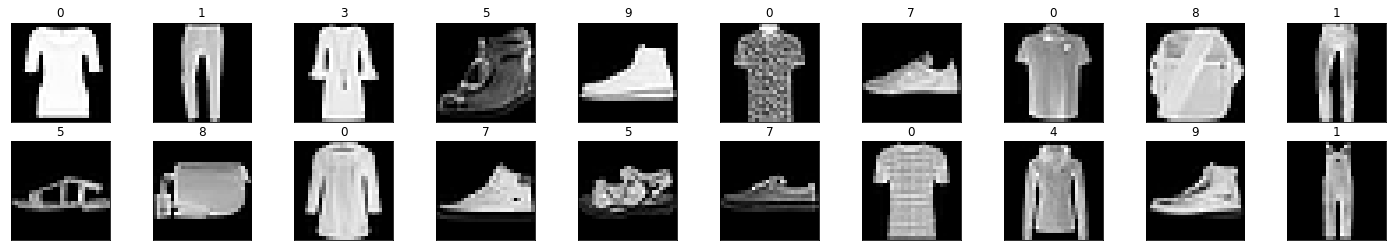

In [4]:
## show some of samples

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()


fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

## baseline model

In [3]:
## define our multi layer perceptron model

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  

In [4]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [6]:
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print("train loss:" + str(running_loss/len(trainloader)))

    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        running_loss += loss.item()

    print("validation loss:" + str(running_loss/len(testloader)))

train loss:0.22232497608992083
validation loss:1.6720047427970133
train loss:0.21216401274699265
validation loss:1.6155096588383435
train loss:0.20174537817520627
validation loss:1.5954054477298336
train loss:0.19611787572026507
validation loss:1.521581204382667
train loss:0.1879797343518148
validation loss:1.4660057357043788
train loss:0.18179823623013014
validation loss:1.4467488669191197
train loss:0.17251351762261155
validation loss:1.4127903327132296
train loss:0.16956576052457412
validation loss:1.3771657015250367
train loss:0.15975627085285338
validation loss:1.3119955372753416
train loss:0.1567704835410184
validation loss:1.3084638930477535
train loss:0.14729574419804284
validation loss:1.2820689573314539
train loss:0.14564730260155792
validation loss:1.2640500639737318
train loss:0.13937439113410552
validation loss:1.2382883835038183
train loss:0.132578702415151
validation loss:1.199643296266722
train loss:0.1297113250599487
validation loss:1.1986270001763182
train loss:0.1224

In [ ]:
l2_norm

tensor(4.9186, grad_fn=<AddBackward0>)

## depth effect

In [ ]:
# 3 layer model

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 64) # layer 2
        self.l3 = nn.Linear(64, 10) # layer 3
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [ ]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print(running_loss/len(trainloader))

0.505106054770667
0.3726182903594045
0.33419145920923526
0.31102790075864617
0.28708211762278574
0.27335627909217564
0.261950713715383
0.24815112728474617
0.23615647784904883
0.2304149878574714


In [ ]:
# 4 layer model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [ ]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print(running_loss/len(trainloader))

0.5135120674014599
0.37471489700427185
0.3351128968094458
0.3148800707273265
0.29298533441256613
0.27848547034616916
0.26571392929201315
0.25102080672439225
0.24003029275915896
0.23187442065111355


In [ ]:
# 5 layer model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 512) # layer 1
        self.l2 = nn.Linear(512, 256) # layer 2
        self.l3 = nn.Linear(256, 128) # layer 3
        self.l4 = nn.Linear(128, 64) # layer 4
        self.l5 = nn.Linear(64, 10) # layer 5
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.relu(x)
        x = self.l5(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [ ]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print(running_loss/len(trainloader))

0.5314860484366224
0.3847516178449334
0.3394985012789525
0.3159855201856287
0.2939696590434005
0.27479936573296976
0.2652279746446655
0.2512153331706646
0.23883334881683657
0.22719028986084944


In [ ]:
# 6 layer model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 512) # layer 1
        self.l2 = nn.Linear(512, 256) # layer 2
        self.l3 = nn.Linear(256, 128) # layer 3
        self.l4 = nn.Linear(128, 64) # layer 4
        self.l5 = nn.Linear(64, 32) # layer 4
        self.l6 = nn.Linear(32, 10) # layer 5
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.relu(x)
        x = self.l5(x)
        x = self.relu(x)
        x = self.l6(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [ ]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print(running_loss/len(trainloader))

0.5719733902894611
0.3936655310902006
0.3502820495968816
0.32696726966673123
0.3017890954545058
0.2864051018235907
0.2713850830028306
0.25555757519755284
0.24675460637553032
0.234819437526087


## dropout

### dropout = 0.2

In [7]:
# 4 layer model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        self.dropout = nn.Dropout(0.2)
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [8]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print('train loss:' + str(running_loss/len(trainloader)))

0.8403250861968568
0.6714292991834917
0.6297839541297986
0.6050123979351414
0.5906604193865872
0.5785891748249912
0.560962390289632
0.551463205422928
0.5430771959647696
0.5360575086717159


### dropout = 0.4

In [9]:
# 4 layer model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        self.dropout = nn.Dropout(0.4)
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [10]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print('train loss:' + str(running_loss/len(trainloader)))

train loss:1.2860043526077067
train loss:1.1009422940358933
train loss:1.0566997859142482
train loss:1.029589519698991
train loss:1.0165055488218377
train loss:1.0024472206259079
train loss:0.9909216037818364
train loss:0.9843692377940424
train loss:0.9732406293151221
train loss:0.9740747042429219


## batch normalization

In [16]:
# 4 layer model with batch normalization
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.batch_norm = nn.BatchNorm1d(784)
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        self.dropout = nn.Dropout(0.4)
        
    
    def forward(self, x):
        x = self.batch_norm(x)
        x = self.l1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [17]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        loss = criterion(output, labels) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print('train loss:' + str(running_loss/len(trainloader)))

train loss:1.210503821688166
train loss:1.056218340897611
train loss:1.0230822265783608
train loss:0.993524034203751
train loss:0.9726865315106886
train loss:0.9575289854489918
train loss:0.9553037776367497
train loss:0.9484205144936088
train loss:0.9321704680350289
train loss:0.9329772121362341


## l2 regularization

In [18]:
# 4 layer model with batch normalization
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.batch_norm = nn.BatchNorm1d(784)
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        self.dropout = nn.Dropout(0.4)
        
    
    def forward(self, x):
        x = self.batch_norm(x)
        x = self.l1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [19]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        l2_norm = sum(torch.linalg.norm(p, 2) for p in NN.parameters())
        loss = criterion(output, labels) + l2_norm
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print('train loss:' + str(running_loss/len(trainloader)))

train loss:18.09819392659771
train loss:2.7042072170070495
train loss:2.649247107475297
train loss:2.6497596713271476
train loss:2.649851002672842
train loss:2.6500414894587956
train loss:2.650630574999079
train loss:2.6514122966510145
train loss:2.651572004818459
train loss:2.651651912152386


## l1 regularization

In [20]:
# 4 layer model with batch normalization
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256) # layer 1
        self.l2 = nn.Linear(256, 128) # layer 2
        self.l3 = nn.Linear(128, 64) # layer 3
        self.l4 = nn.Linear(64, 10) # layer 4
        
        self.batch_norm = nn.BatchNorm1d(784)
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        self.dropout = nn.Dropout(0.4)
        
    
    def forward(self, x):
        x = self.batch_norm(x)
        x = self.l1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.dropout(x)
        x = self.softmax(x)
        return x
    
NN = MLP()  
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(NN.parameters(), lr = 0.001)

In [21]:
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = NN(images) 
        l1_norm = sum(torch.linalg.norm(p, 1) for p in NN.parameters())
        loss = criterion(output, labels) + l1_norm
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item()

    print('train loss:' + str(running_loss/len(trainloader)))

train loss:431.0611344522505
train loss:10.155544626687382
train loss:6.9053554712836425
train loss:5.725875171262826
train loss:5.202781747907464
train loss:5.016227139084578
train loss:4.835661190659253
train loss:4.549983263524102
train loss:4.3165350496641866
train loss:4.174786261403993
